In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

log(1) = c1x1 + c2x2 + intercept

(log.(1)-intercept - c1x1)/c2

In [2]:
data = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

In [3]:
data.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [4]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [5]:
ct = ColumnTransformer(
    [("keep", FunctionTransformer(None), ["age", "chol"])],
remainder="drop"
)


Log_Reg = Pipeline([('ct', ct),
    ('log_reg', LogisticRegression())
])

fitted_log = Log_Reg.fit(X, y)
fitted_log.named_steps['log_reg'].coef_

array([[0.04686331, 0.00180124]])

In [6]:
fitted_log.named_steps['log_reg'].intercept_

array([-3.24011226])

In [7]:
(np.log(9) + 3.24011226 - 0.04686331*55)/0.00180124

1587.7144563390887

In [18]:
data['chol_log'] = (np.log(1) + 3.24011226 -.04686331* data['age'])/0.00180124

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [8]:
Lda_pipeline = Pipeline(
    [("ct", ct),
     ("LDA", LinearDiscriminantAnalysis())]
)
LDA_fit =Lda_pipeline.fit(X, y)

In [9]:
LDA_fit.named_steps['LDA'].coef_

array([[0.04655744, 0.00178967]])

In [10]:
LDA_fit.named_steps['LDA'].intercept_

array([-3.21967766])

In [11]:
(3.21967766 -0.04655744*55)/0.00178967

368.2346242603385

In [30]:
data['chol_LDA'] =  (3.21967766 -0.04655744*data["age"])/0.00178967

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [12]:
SVC_pipeline = Pipeline(
    [("ct", ct),
     ("SVC", SVC(kernel= "linear"))]
)

SVC_fitted = SVC_pipeline.fit(X, y)

In [13]:
SVC_fitted.named_steps['SVC'].coef_

array([[0.06439772, 0.00365896]])

In [14]:
SVC_fitted.named_steps['SVC'].intercept_

array([-4.68603406])

In [15]:
(4.68603406-0.06439772*55)/0.00365896

312.70072916894406

In [31]:
data['chol_SVC'] = (4.68603406-0.06439772*data['age'])/0.00365896

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [42]:
from plotnine import ggplot, geom_point, aes, geom_line, geom_text, geom_smooth

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


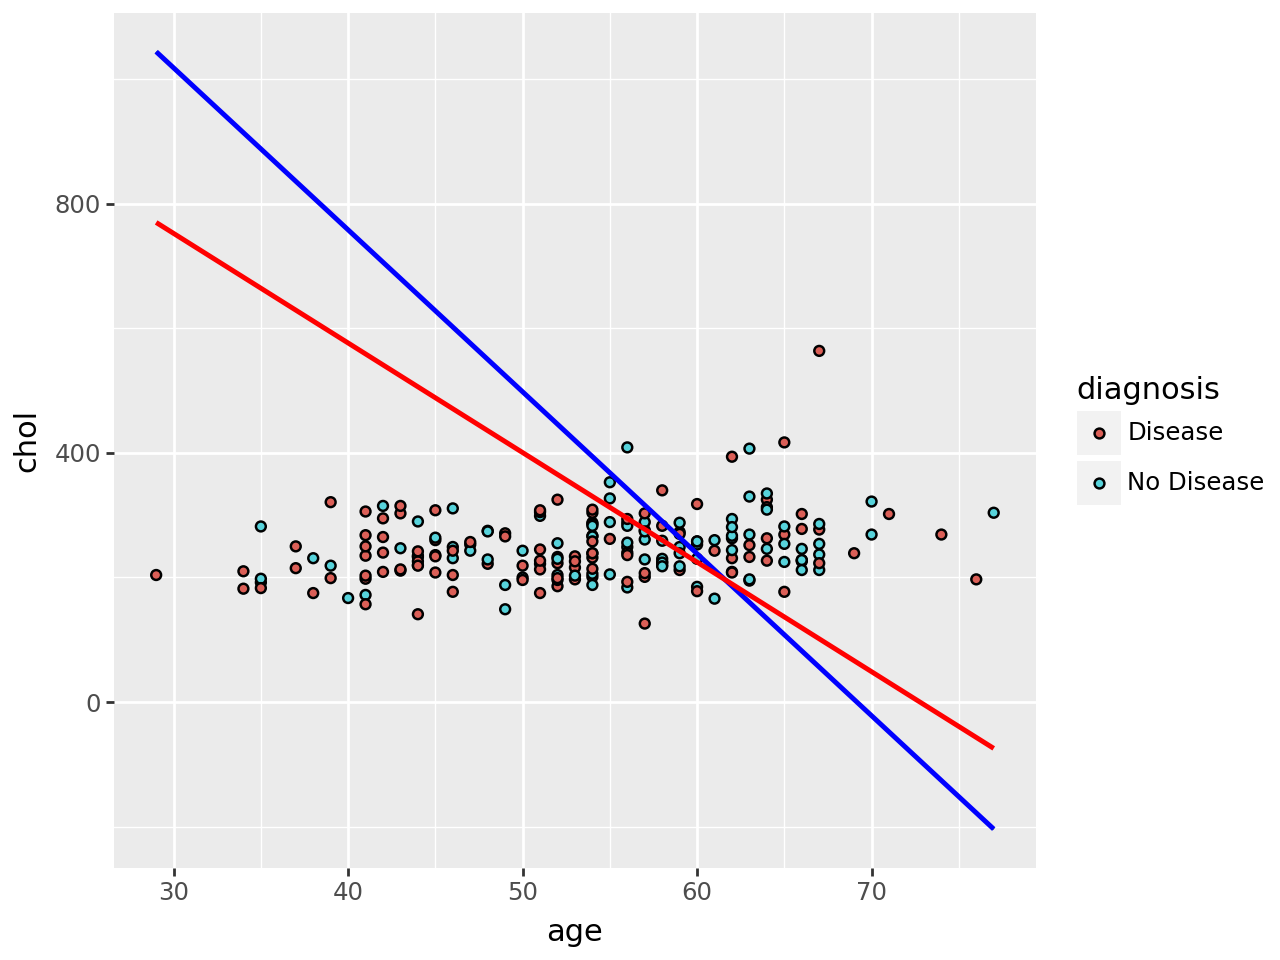

In [46]:
(ggplot(data)+ geom_point(aes(x = "age", y ="chol", fill = "diagnosis")) + geom_line(aes(x= "age", y = "chol_log"), color = "green") +geom_smooth(aes(x= "age", y = "chol_LDA"), color = "blue") +geom_smooth(aes(x= "age", y = "chol_SVC"), color = "red"))